### <font color='red'> NOTE: Please do not edit this file.</font> Go to <font color='white'>*File > Save a copy in Drive*</font>.

# **Course: Sistemas Inteligentes 2025**
### **Lab03: Regresión Logística**

---


Este es el segundo laboratorio relacionado con Regresión Logística para el curso **Sistemas Inteligentes 2025**.

En este notebook aprenderás los principios basicos de Regresion Logística para clasificacion de datos.

- Make a copy of this folder into your own machine and/or to your Google Drive.

In [1]:
!pip install seaborn scikit-learn matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_curve, roc_auc_score,
                             confusion_matrix, classification_report)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Paso 1: Cargar el conjunto de datos

In [2]:


import pandas as pd

# Montar Google Drive si el archivo está ahí (opcional)
from google.colab import drive
drive.mount('/content/drive')

# Cargar el dataset
df = pd.read_csv('/content/sample_data/diabetes.csv') # Ruta relativa o completa en tu entorno

# Mostrar las primeras filas
df.head()


Mounted at /content/drive


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Paso 2: Exploración inicial de los datos

In [3]:
# Información general
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Estadísticas descriptivas
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Valores nulos
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
# Verificar ceros en columnas clínicas
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zeros:
    df[col] = df[col].replace(0, df[col].median())


# Paso 3: Análisis de correlación

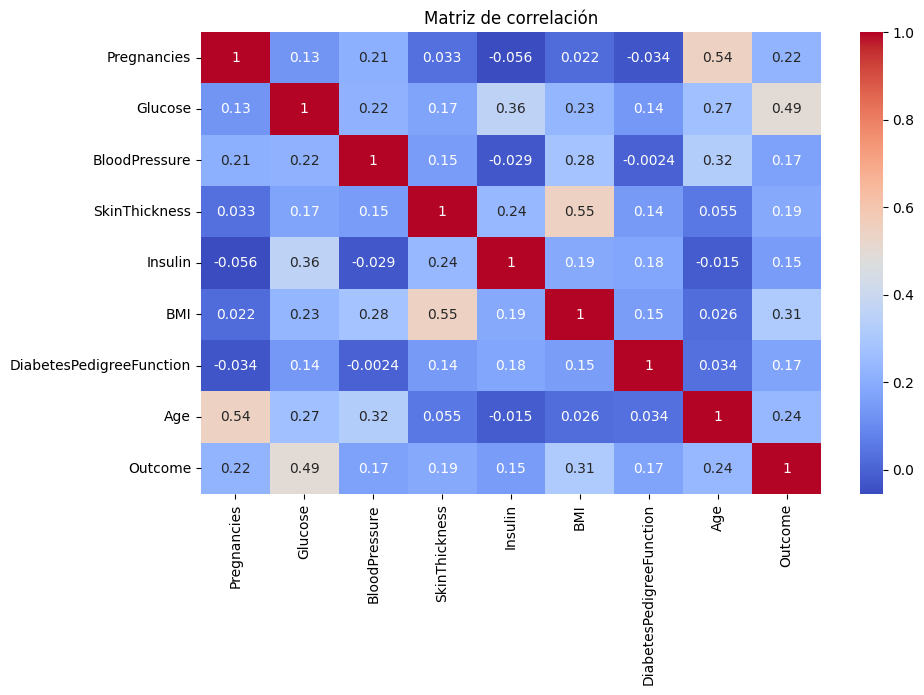

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


# Paso 4: Selección de variables y separación de datos

In [8]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


# Paso 5: Entrenamiento del modelo

In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


# Paso 6: Evaluación del modelo

Accuracy : 0.70
Precision: 0.58
Recall   : 0.52
F1 Score : 0.55


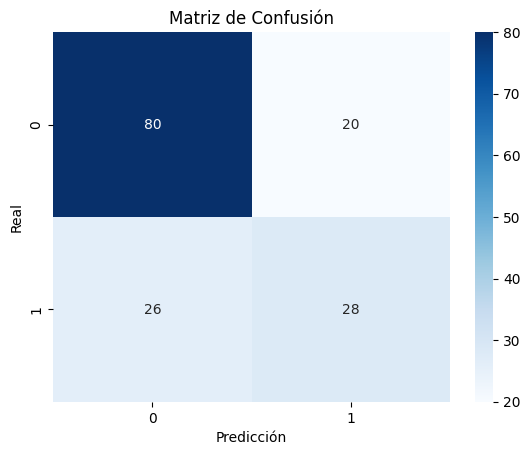

In [10]:
# Métricas clásicas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall   : {rec:.2f}")
print(f"F1 Score : {f1:.2f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


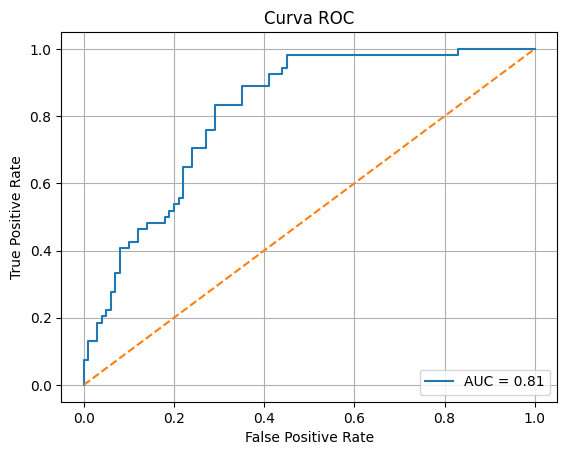

In [11]:
# Curvas ROC Y AOC
# Calcular curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Curva ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [12]:
# ANALISIS DE LA EFICIENCIA DEL MODELO
print("Análisis del modelo:\n")

print(f"- Precisión general (Accuracy): {acc:.2f}")
print(f"- Capacidad de detectar positivos reales (Recall): {rec:.2f}")
print(f"- Equilibrio entre precisión y recall (F1-score): {f1:.2f}")
print(f"- Área bajo la curva ROC (AUC): {auc:.2f}")

if acc > 0.75 and auc > 0.80:
    print("\n✅ El modelo muestra un rendimiento aceptable y podría usarse como herramienta de apoyo al diagnóstico.")
elif acc > 0.65:
    print("\n⚠️ El modelo tiene rendimiento moderado. Puede mejorarse con técnicas como normalización, selección de características o modelos más complejos.")
else:
    print("\n❌ El modelo no es eficiente. No debe usarse para tomar decisiones clínicas.")


Análisis del modelo:

- Precisión general (Accuracy): 0.70
- Capacidad de detectar positivos reales (Recall): 0.52
- Equilibrio entre precisión y recall (F1-score): 0.55
- Área bajo la curva ROC (AUC): 0.81

⚠️ El modelo tiene rendimiento moderado. Puede mejorarse con técnicas como normalización, selección de características o modelos más complejos.


# Paso 9: Como mejoro el modelo?
Tarea para el alumno: Geiner Castrejon Calua

## Aplicamos EDA
1. Verificamos Valores Faltantes

In [13]:
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


2. Verificar valores repetidos


In [15]:
# Revisar duplicados
duplicados = df.duplicated().sum()
print(f"Filas duplicadas encontradas: {duplicados}")


Filas duplicadas encontradas: 0


# Analisis Univariado

📊 Estadísticas generales:


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


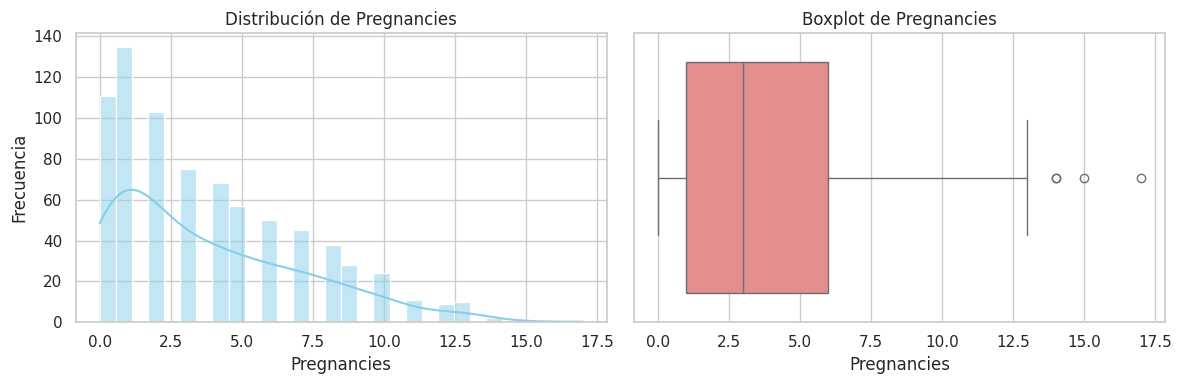

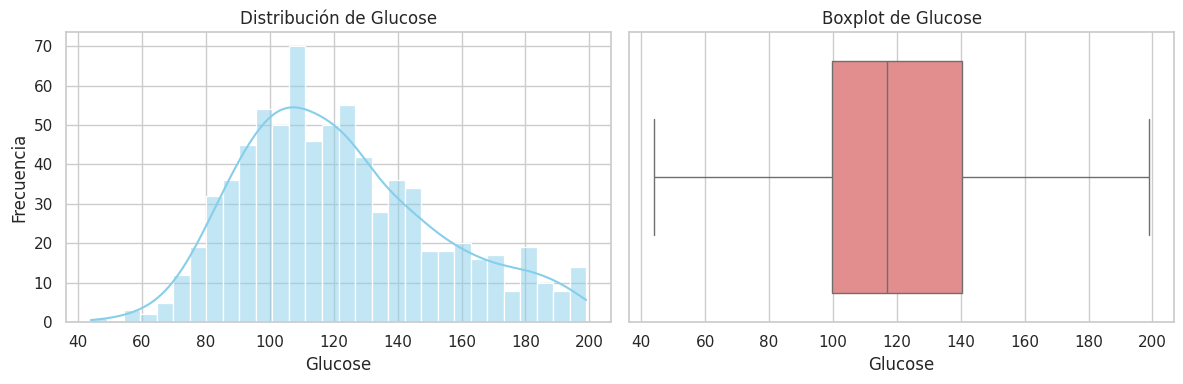

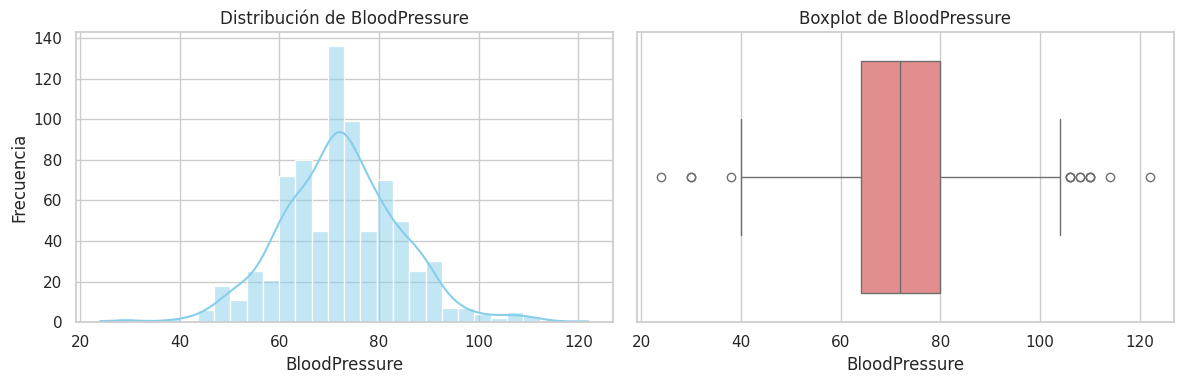

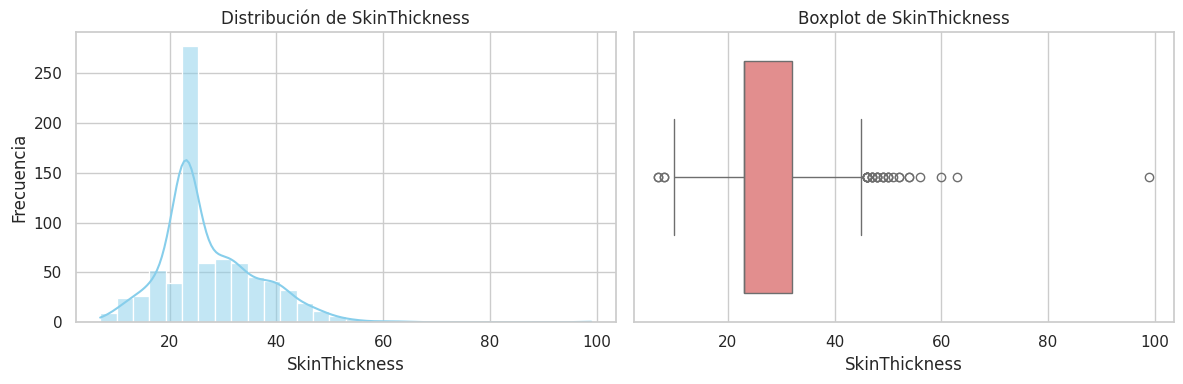

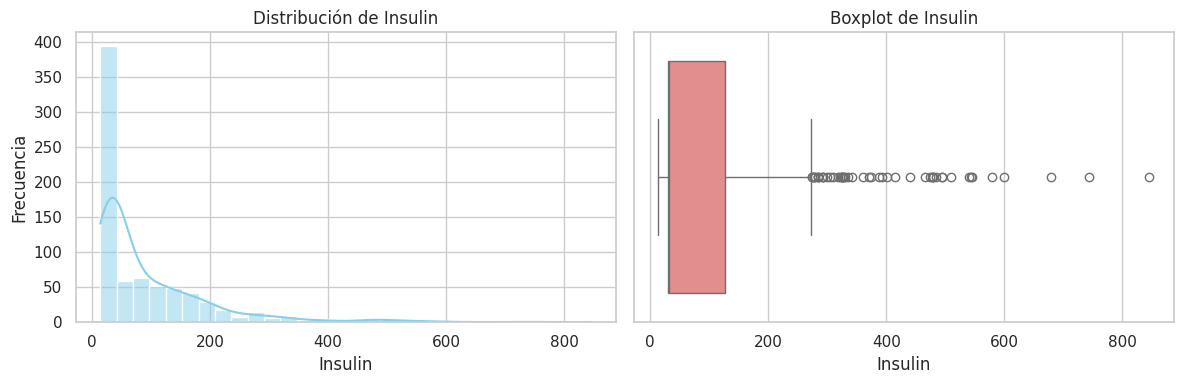

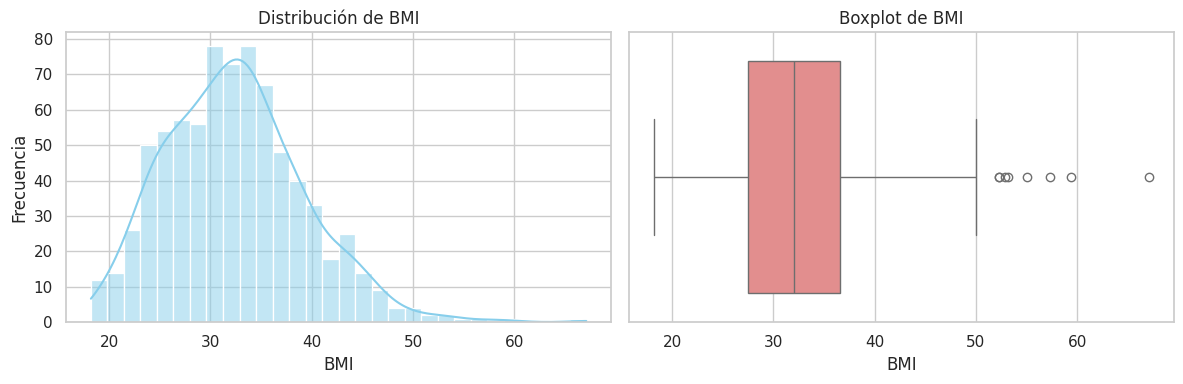

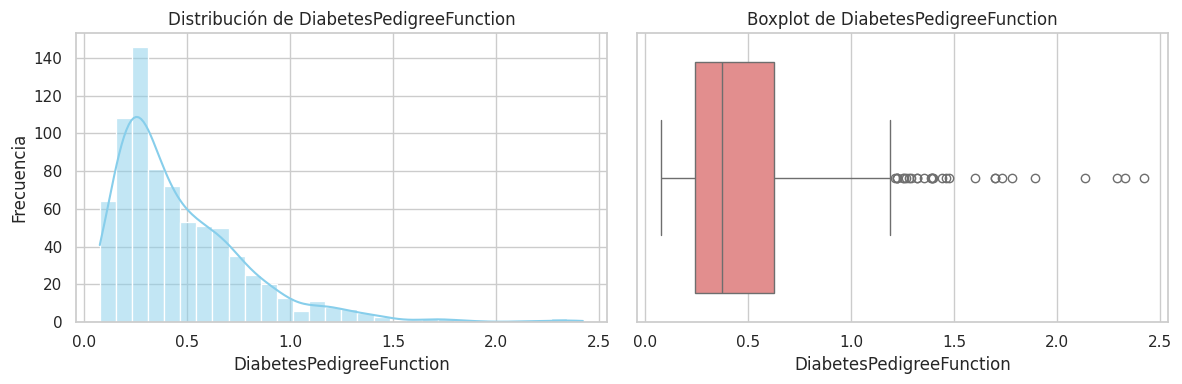

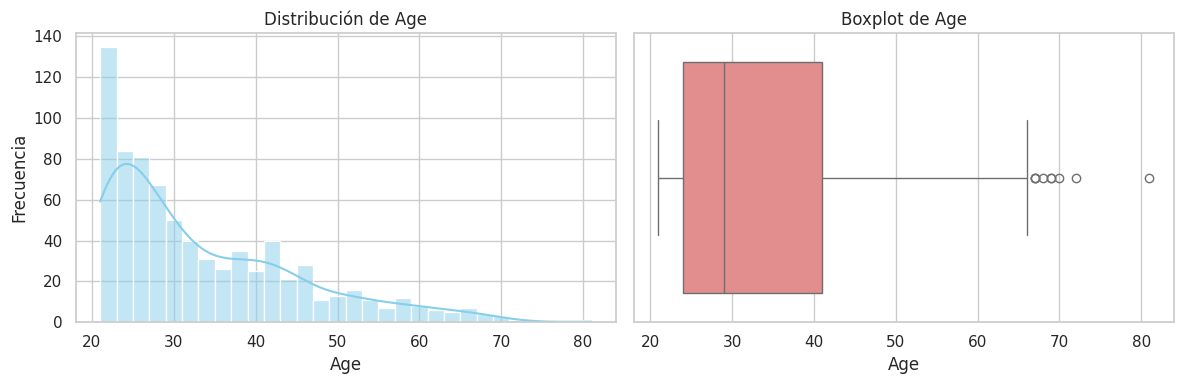

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones
sns.set(style="whitegrid")
variables = df.columns[:-1]  # Excluir 'Outcome'

# Estadísticas resumen
print("📊 Estadísticas generales:")
display(df[variables].describe().T)

# Visualizaciones por variable
for col in variables:
    plt.figure(figsize=(12, 4))

    # Histograma + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

    # Boxplot para outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


1. Estandarización de variables

In [18]:
from sklearn.preprocessing import StandardScaler

# Separar variables
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# Entrenar regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy : {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall   : {rec:.2f}")
print(f"F1 Score : {f1:.2f}")
print(f"AUC      : {auc:.2f}")


Accuracy : 0.71
Precision: 0.60
Recall   : 0.50
F1 Score : 0.55
AUC      : 0.82


#  Usamos SelectKBest

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar las 5 mejores características
selector_kbest = SelectKBest(score_func=f_classif, k=5)
X_kbest = selector_kbest.fit_transform(X_scaled, y)

# Obtener nombres de las variables seleccionadas
selected_features_kbest = X.columns[selector_kbest.get_support()]
print("📌 SelectKBest - Variables seleccionadas:", selected_features_kbest.tolist())


📌 SelectKBest - Variables seleccionadas: ['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age']


In [22]:
# División de datos con SelectKBest
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_kbest, y, test_size=0.2, stratify=y, random_state=42)

# Modelo
modelo_kbest = LogisticRegression(max_iter=1000)
modelo_kbest.fit(X_train_k, y_train_k)
y_pred_k = modelo_kbest.predict(X_test_k)
y_prob_k = modelo_kbest.predict_proba(X_test_k)[:, 1]

# Métricas
acc_k = accuracy_score(y_test_k, y_pred_k)
prec_k = precision_score(y_test_k, y_pred_k)
rec_k = recall_score(y_test_k, y_pred_k)
f1_k = f1_score(y_test_k, y_pred_k)
auc_k = roc_auc_score(y_test_k, y_prob_k)

print("📊 Modelo con SelectKBest:")
print(f"Accuracy : {acc_k:.2f}")
print(f"Precision: {prec_k:.2f}")
print(f"Recall   : {rec_k:.2f}")
print(f"F1 Score : {f1_k:.2f}")
print(f"AUC      : {auc_k:.2f}")


📊 Modelo con SelectKBest:
Accuracy : 0.70
Precision: 0.58
Recall   : 0.54
F1 Score : 0.56
AUC      : 0.80


📊 Modelo con SelectKBest:
* Accuracy : 0.70 --> Nos indica que el modelo acierta en un 70% de la predicciones totales.
* Precision: 0.58 --> De todos los pacientes con diabetets el modelo predijo al 58% lo son en realidad
* Recall   : 0.54 --> El modelo esta detectando 54 % de verdaderos positivos pero aun se le estan escapando el 46 de casos de casos poitivos.
* F1 Score : 0.56 --> El balance entre recall y precision es de un nivel moderado.
* AUC      : 0.80 --> Que el modelo tiene buena capacida para distinguir entre positivos y negativos.


# RFE con regresión logística

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Usar regresión logística como modelo base
modelo_base = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=modelo_base, n_features_to_select=5)
X_rfe = rfe.fit_transform(X_scaled, y)

# Nombres seleccionados
selected_features_rfe = X.columns[rfe.support_]
print("📌 RFE - Variables seleccionadas:", selected_features_rfe.tolist())


📌 RFE - Variables seleccionadas: ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']


In [24]:
# División de datos con RFE
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_rfe, y, test_size=0.2, stratify=y, random_state=42)

# Modelo
modelo_rfe = LogisticRegression(max_iter=1000)
modelo_rfe.fit(X_train_r, y_train_r)
y_pred_r = modelo_rfe.predict(X_test_r)
y_prob_r = modelo_rfe.predict_proba(X_test_r)[:, 1]

# Métricas
acc_r = accuracy_score(y_test_r, y_pred_r)
prec_r = precision_score(y_test_r, y_pred_r)
rec_r = recall_score(y_test_r, y_pred_r)
f1_r = f1_score(y_test_r, y_pred_r)
auc_r = roc_auc_score(y_test_r, y_prob_r)

print("📊 Modelo con RFE:")
print(f"Accuracy : {acc_r:.2f}")
print(f"Precision: {prec_r:.2f}")
print(f"Recall   : {rec_r:.2f}")
print(f"F1 Score : {f1_r:.2f}")
print(f"AUC      : {auc_r:.2f}")


📊 Modelo con RFE:
Accuracy : 0.71
Precision: 0.60
Recall   : 0.54
F1 Score : 0.57
AUC      : 0.81


📊 Modelo con RFE:
* Accuracy : 0.71 --> Muestra un merjora ligeramente del 70 % de SelectkBest
* Precision: 0.60 --> Mas confiable que el selectkBest en precicir que un paciente sea diabetico
* Recall   : 0.54 --> detecta igual que el selectkbest en 54% de la mitad de positivos
* F1 Score : 0.57 -->
* AUC      : 0.81 --> Mejor que el selectKBest

# Crear Variables :
para volver a usara RDF y SelectKBest


In [25]:
# Crear nuevas variables derivadas
df['glucose_bmi'] = df['Glucose'] * df['BMI']
df['age_pedigree_ratio'] = df['Age'] / (df['DiabetesPedigreeFunction'] + 1e-3)  # evitar división por cero
df['insulin_glucose_ratio'] = df['Insulin'] / (df['Glucose'] + 1e-3)
df['pregnancies_age_ratio'] = df['Pregnancies'] / (df['Age'] + 1e-3)
df['glucose_log'] = np.log(df['Glucose'] + 1)


In [27]:
from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar 8 mejores variables
selector_kbest = SelectKBest(score_func=f_classif, k=5)
X_kbest = selector_kbest.fit_transform(X_scaled, y)

# Obtener nombres de variables seleccionadas
selected_features_kbest = X.columns[selector_kbest.get_support()]
print("📌 SelectKBest - Variables seleccionadas:", selected_features_kbest.tolist())


📌 SelectKBest - Variables seleccionadas: ['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age']
